# **Machine Learning**

**INTERMEDIATE QUESTIONS :**

**Question 1 :-** 

Imagine you have a dataset where you have different Instagram features
like u sername , Caption , Hashtag , Followers , Time_Since_posted , and likes , now your task is to predict the number of likes and Time Since posted and the rest of the features are your input features. Now you have to build a model which can predict the number of likes and Time Since posted.

[Dataset](https://www.kaggle.com/datasets/rxsraghavagrawal/instagram-reach)

This is the Dataset You can use this dataset for this question.

**Answer 1 :-** Firstly download the dataset from the given link.

In [2]:
#Import required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("instagram_reach.csv")

In [4]:
data.head(10)

,Unnamed: 0,S.No,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,0,1,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11 hours,139
1,1,2,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2 hours,23
2,2,3,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2 hours,25
3,3,4,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3 hours,49
4,4,5,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3 hours,30
5,5,6,be.masterly,Cyber attacks are more frequent every day and ...,1231,#edtech #learning#educationtechnology #tech #l...,3 hours,18
6,6,7,lenovoworkstations,Check it out – we’re walking across the 🌎’s fi...,259,.#Tech #virtualreality #IoT #Machinelearning,3 hours,35
7,7,8,kirellb,Here's a network I made that depicts the scien...,1433,#datascientist #creativetechnology#design #art...,4 hours,86
8,8,9,ethicsandai,Having a great week at @ldntechweek exploring ...,13,#LTW #London #TechXLR8 #Technology#AI #Artific...,4 hours,22
9,9,10,diworksolucionesdeti,The Internet of Things : A Very Short Story [#...,450,[#Infographic] #Wearable #Sensors #MachineLear...,7 hours,18


In [5]:
data.shape

(100, 8)

In [6]:
# drop unwanted features
data.drop(["Unnamed: 0","S.No","USERNAME"],axis=1,inplace=True)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Caption            94 non-null     object
 1   Followers          100 non-null    int64 
 2   Hashtags           100 non-null    object
 3   Time since posted  100 non-null    object
 4   Likes              100 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 4.0+ KB


In [8]:
data["Time since posted"] = data["Time since posted"].apply(lambda x:x.replace("hours","")).astype(float)

In [9]:
# use label encoding on categorical data
from sklearn.preprocessing import LabelEncoder
lable = LabelEncoder()
cato = ["Caption","Hashtags"]
for i in cato:
    data[i] = lable.fit_transform(data[i])

In [10]:
x = data.drop(["Time since posted","Likes"],axis=1)
y = data[["Time since posted","Likes"]]

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42)

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [13]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [15]:
def model_evaluation(test,pread):
    mse = mean_squared_error(test,pread)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(test,pread)
    r2 = r2_score(test,pread)
    
    return mse,rmse,mae,r2

In [16]:
forest = RandomForestRegressor()
forest.fit(X_train,y_train)

RandomForestRegressor()

In [17]:
forest.score(X_train,y_train)

0.846767890066447

In [18]:
ypred = forest.predict(X_test)
model_evaluation(y_test,ypred)

(512.7680675, 22.64438269196138, 11.843749999999998, 0.2543603650135085)



---



**Question 2 :-** Imagine you have a dataset where you have different features like Age , Gender , Height , Weight , BMI , and Blood Pressure and you have to classify the people into different classes like Normal , Overweight , Obesity , Underweight , and Extreme Obesity by using any 4 different classification algorithms. Now you have to build a model which can classify people into different classes.

[Dataset](https://www.kaggle.com/datasets/ankurbajaj9/obesity-levels)

This is the Dataset You can use this dataset for this question.

**Answer 2 :-** Firstly download the dataset and convert the file from 'arff' to 'csv' from the given link.

In [20]:
data = pd.read_csv("ObesityDataSet_raw_and_data_sinthetic.csv")

In [22]:
data.head(10)

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,1,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,2,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,3,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,4,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,5,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II
5,6,Male,29.0,1.62,53.0,no,yes,2.0,3.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Automobile,Normal_Weight
6,7,Female,23.0,1.50,55.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,0.0,Sometimes,Motorbike,Normal_Weight
7,8,Male,22.0,1.64,53.0,no,no,2.0,3.0,Sometimes,no,2.0,no,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
8,9,Male,24.0,1.78,64.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,1.0,Frequently,Public_Transportation,Normal_Weight
9,10,Male,22.0,1.72,68.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,1.0,1.0,no,Public_Transportation,Normal_Weight


In [26]:
#check null values
data.isnull().sum()

id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [27]:
#check duplicate values
data.duplicated().sum()

0

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              2111 non-null   int64  
 1   Gender                          2111 non-null   object 
 2   Age                             2111 non-null   float64
 3   Height                          2111 non-null   float64
 4   Weight                          2111 non-null   float64
 5   family_history_with_overweight  2111 non-null   object 
 6   FAVC                            2111 non-null   object 
 7   FCVC                            2111 non-null   float64
 8   NCP                             2111 non-null   float64
 9   CAEC                            2111 non-null   object 
 10  SMOKE                           2111 non-null   object 
 11  CH2O                            2111 non-null   float64
 12  SCC                             21

In [29]:
# saprate numerical and categorical frature
catigorical_features = data.select_dtypes(include="object").columns
numerical_features = data.select_dtypes(exclude="object").columns
print(catigorical_features)
print(numerical_features)

Index(['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE',
       'SCC', 'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')
Index(['id', 'Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE'], dtype='object')


<Axes: ylabel='NObeyesdad'>

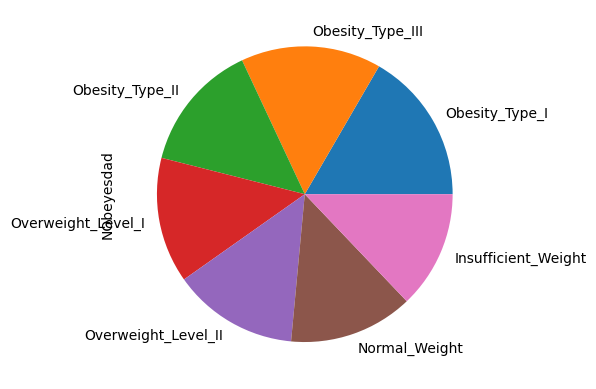

In [30]:
data['NObeyesdad'].value_counts().plot.pie()

In [31]:
# use label encoding on categorical data
from sklearn.preprocessing import LabelEncoder
lable = LabelEncoder()

for i in catigorical_features:
    data[i] = lable.fit_transform(data[i])

<Axes: >

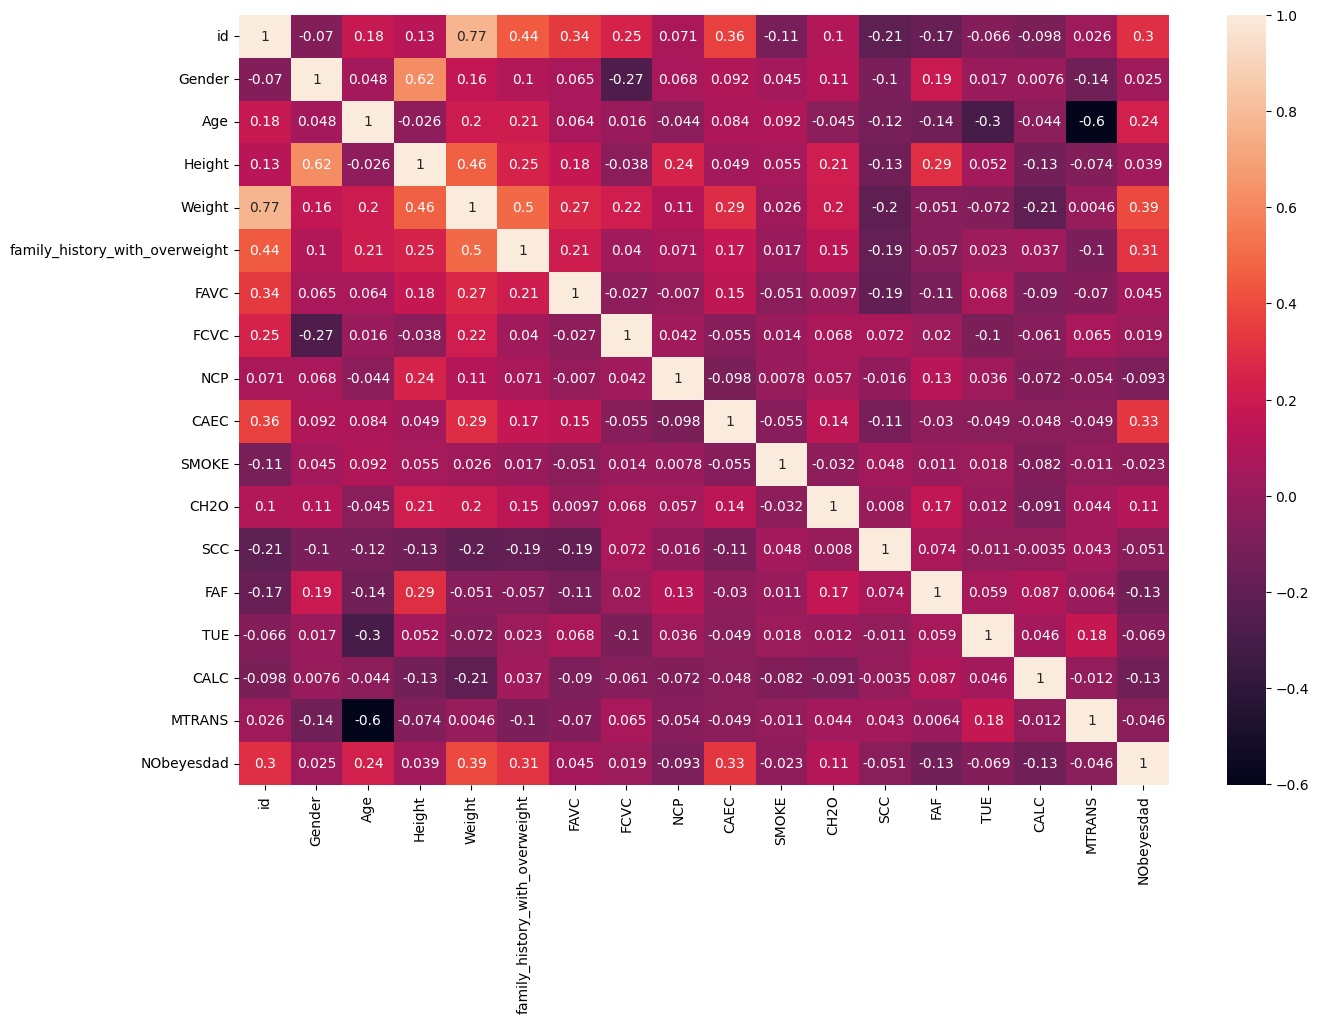

In [32]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),annot=True)

In [33]:
x = data.drop('NObeyesdad',axis=1)
y = data['NObeyesdad']

In [34]:
# seperate numerical and categorical frature
catigorical_features = x.select_dtypes(include="object").columns
numerical_features = x.select_dtypes(exclude="object").columns
print(catigorical_features)
print(numerical_features)

Index([], dtype='object')
Index(['id', 'Gender', 'Age', 'Height', 'Weight',
       'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC',
       'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS'],
      dtype='object')


In [35]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [36]:
## Numerical Pipline
num_pipline = Pipeline(
    steps=[
        ("imputer",SimpleImputer(strategy="median")),
        ("scaler",StandardScaler())
    ]
)

cato_pipline = Pipeline(
    steps=[
        ("imputer",SimpleImputer(strategy="most_frequent")),
        ("scaler",StandardScaler())
    ]
)

# Create Preprocessor object
preprocessor = ColumnTransformer([
    ("num_pipline",num_pipline,numerical_features),
    ("cato_pipline",cato_pipline,catigorical_features)
])

In [37]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42)

In [38]:
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [39]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [40]:
# Logastic regression
logestic = LogisticRegression(class_weight="balanced")
logestic.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced')

In [41]:
logestic.score(X_train,y_train)

0.9063981042654028

In [42]:
y_pred = logestic.predict(X_test)

In [43]:
accuracy_score(y_test,y_pred)

0.8936170212765957

In [44]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97        56
           1       0.82      0.87      0.84        62
           2       0.96      0.88      0.92        78
           3       0.92      0.95      0.93        58
           4       1.00      1.00      1.00        63
           5       0.75      0.77      0.76        56
           6       0.79      0.82      0.80        50

    accuracy                           0.89       423
   macro avg       0.89      0.89      0.89       423
weighted avg       0.90      0.89      0.89       423



In [45]:
# Support Vector mechine
svm = SVC(C=10)
svm.fit(X_train,y_train)

SVC(C=10)

In [46]:
svm.score(X_train,y_train)

0.9988151658767772

In [47]:
y_pred = svm.predict(X_test)

In [48]:
accuracy_score(y_test,y_pred)

0.9196217494089834

In [49]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96        56
           1       0.81      0.87      0.84        62
           2       0.94      0.92      0.93        78
           3       1.00      0.97      0.98        58
           4       1.00      1.00      1.00        63
           5       0.84      0.84      0.84        56
           6       0.91      0.86      0.89        50

    accuracy                           0.92       423
   macro avg       0.92      0.92      0.92       423
weighted avg       0.92      0.92      0.92       423



In [50]:
# Decision Tree
tree = DecisionTreeClassifier(max_depth=10,class_weight="balanced",min_samples_split=5)
tree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=10,
                       min_samples_split=5)

In [51]:
tree.score(X_train,y_train)

0.9496445497630331

In [52]:
y_pred = tree.predict(X_test)

In [53]:
accuracy_score(y_test,y_pred)

0.933806146572104

In [54]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96        56
           1       0.78      0.98      0.87        62
           2       0.95      0.95      0.95        78
           3       1.00      0.98      0.99        58
           4       1.00      1.00      1.00        63
           5       0.95      0.75      0.84        56
           6       0.92      0.90      0.91        50

    accuracy                           0.93       423
   macro avg       0.94      0.93      0.93       423
weighted avg       0.94      0.93      0.93       423



In [55]:
# RandomForest
forest = RandomForestClassifier(n_estimators=200,max_depth=10,class_weight="balanced",min_samples_split=5)
forest.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10,
                       min_samples_split=5, n_estimators=200)

In [56]:
forest.score(X_train,y_train)

0.9934834123222749

In [57]:
y_pred = forest.predict(X_test)

In [58]:
accuracy_score(y_test,y_pred)

0.9385342789598109

In [59]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        56
           1       0.82      0.97      0.89        62
           2       0.97      0.91      0.94        78
           3       1.00      0.97      0.98        58
           4       1.00      1.00      1.00        63
           5       0.87      0.84      0.85        56
           6       0.92      0.92      0.92        50

    accuracy                           0.94       423
   macro avg       0.94      0.94      0.94       423
weighted avg       0.94      0.94      0.94       423





---



**Question 3 :-**

Imagine you have a dataset where you have different categories of data, Now
you need to find the most similar data to the given data by using any 4 different
similarity algorithms. Now you have to build a model which can find the most similar
data to the given data.

[Dataset](https://www.kaggle.com/datasets/rmisra/news-category-dataset)

This is the Dataset You can use this dataset for this question.

**Answer 3 :-** NOT DONE



---



**Question 4 :-** Imagine you working as a sale manager now you need to predict the Revenue and whether that particular revenue is on the weekend or not and find the Informational_Duration using the Ensemble learning algorithm.

[Dataset](https://www.kaggle.com/datasets/henrysue/online-shoppers-intention)

This is the Dataset You can use this dataset for this question.

**Answer 4 :-** Firstly download the dataset from the given link.

In [60]:
data = pd.read_csv("online_shoppers_intention.csv")

In [61]:
data.head(10)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,Feb,2,2,1,3,Returning_Visitor,False,False
6,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.4,Feb,2,4,3,3,Returning_Visitor,False,False
7,1,0.0,0,0.0,0,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,2,1,5,Returning_Visitor,True,False
8,0,0.0,0,0.0,2,37.000000,0.000000,0.100000,0.0,0.8,Feb,2,2,2,3,Returning_Visitor,False,False
9,0,0.0,0,0.0,3,738.000000,0.000000,0.022222,0.0,0.4,Feb,2,4,1,2,Returning_Visitor,False,False


In [62]:
#check null values
data.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [63]:
#check duplicate values
data.duplicated().sum()

125

In [64]:
#dropping duplicate values
data.drop_duplicates(inplace=True)

In [70]:
#check duplicate values
data.duplicated().sum()

0

In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12205 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12205 non-null  int64  
 1   Administrative_Duration  12205 non-null  float64
 2   Informational            12205 non-null  int64  
 3   Informational_Duration   12205 non-null  float64
 4   ProductRelated           12205 non-null  int64  
 5   ProductRelated_Duration  12205 non-null  float64
 6   BounceRates              12205 non-null  float64
 7   ExitRates                12205 non-null  float64
 8   PageValues               12205 non-null  float64
 9   SpecialDay               12205 non-null  float64
 10  Month                    12205 non-null  object 
 11  OperatingSystems         12205 non-null  int64  
 12  Browser                  12205 non-null  int64  
 13  Region                   12205 non-null  int64  
 14  TrafficType           

In [66]:
data["Revenue"] = data["Revenue"].map({True:1,False:0})
data['Weekend'] = data['Weekend'].map({True:1,False:0})

In [67]:
# seprate numerical and categorical frature
catigorical_features = data.select_dtypes(include="object").columns
numerical_features = data.select_dtypes(exclude="object").columns
print(catigorical_features)
print(numerical_features)

Index(['Month', 'VisitorType'], dtype='object')
Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Weekend',
       'Revenue'],
      dtype='object')


In [68]:
# use label encoding on categorical data
from sklearn.preprocessing import LabelEncoder
lable = LabelEncoder()

for i in catigorical_features:
    data[i] = lable.fit_transform(data[i])

<Axes: >

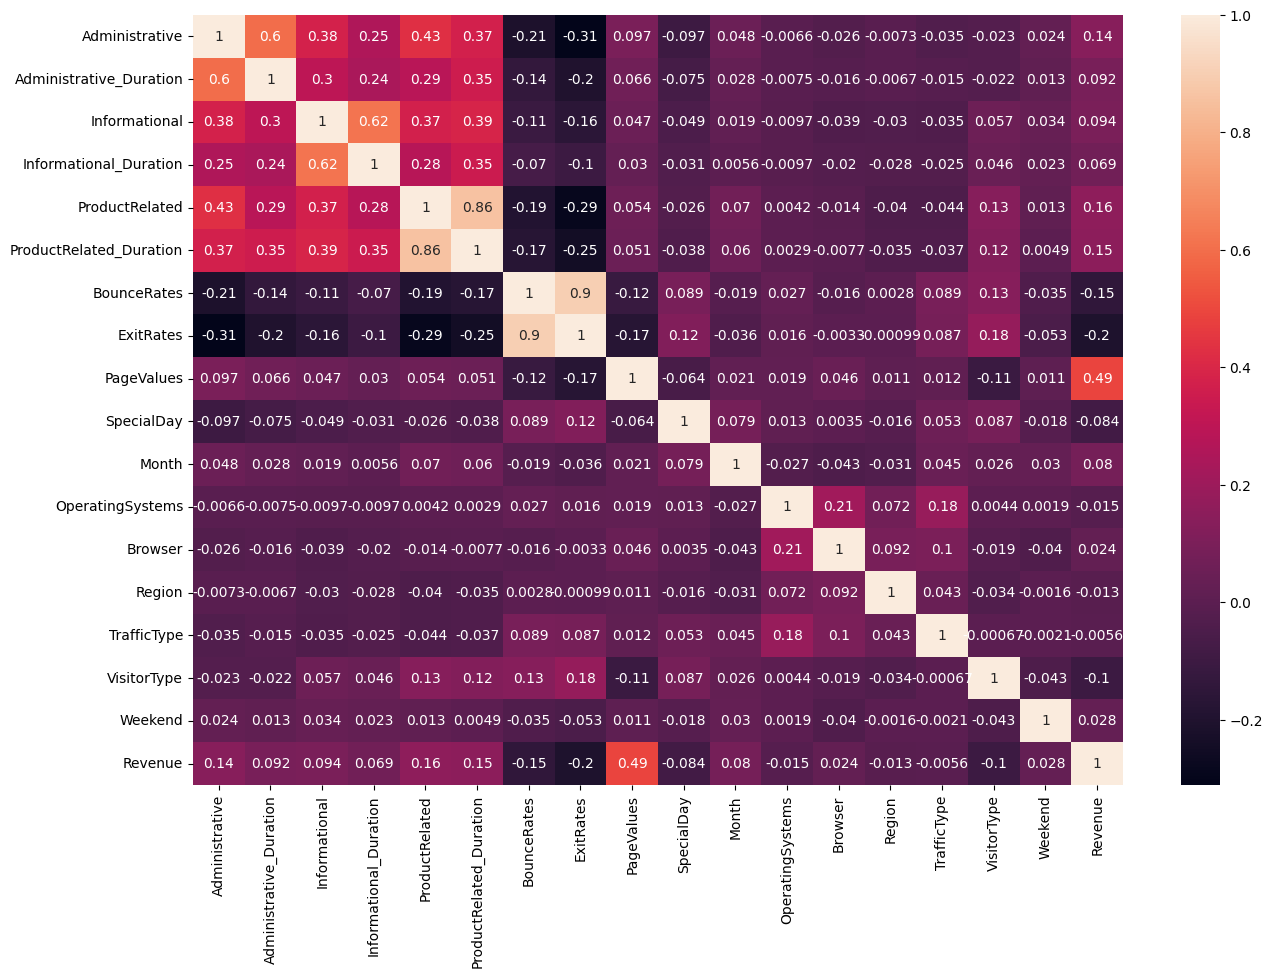

In [69]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),annot=True)

In [71]:
x = data.drop("Revenue",axis=1)
y = data["Revenue"]

In [72]:
# saprate numerical and categorical frature
categorical_features = x.select_dtypes(include="object").columns
numerical_features = x.select_dtypes(exclude="object").columns
print(catigorical_features)
print(numerical_features)

Index(['Month', 'VisitorType'], dtype='object')
Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend'],
      dtype='object')


In [73]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [74]:
## Numerical Pipline
num_pipline = Pipeline(
    steps=[
        ("imputer",SimpleImputer(strategy="median")),
        ("scaler",StandardScaler())
    ]
)

cato_pipline = Pipeline(
    steps=[
        ("imputer",SimpleImputer(strategy="most_frequent")),
        ("scaler",StandardScaler())
    ]
)

# Create Preprocessor object
preprocessor = ColumnTransformer([
    ("num_pipline",num_pipline,numerical_features),
    ("cato_pipline",cato_pipline,catigorical_features)
])

In [75]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42)

In [76]:
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [77]:
# RandomForest
forest = RandomForestClassifier(n_estimators=250,max_depth=15,class_weight="balanced",min_samples_split=6)
forest.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', max_depth=15,
                       min_samples_split=6, n_estimators=250)

In [78]:
forest.score(X_train,y_train)

0.9705038918476034

In [79]:
y_pred = forest.predict(X_test)

In [80]:
accuracy_score(y_test,y_pred)

0.8947152806226956

In [81]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      2079
           1       0.64      0.65      0.65       362

    accuracy                           0.89      2441
   macro avg       0.79      0.80      0.79      2441
weighted avg       0.90      0.89      0.90      2441



In [82]:
from sklearn.ensemble import BaggingClassifier
bagging = BaggingClassifier(n_estimators=50)
bagging.fit(X_train,y_train)

BaggingClassifier(n_estimators=50)

In [83]:
bagging.score(X_train,y_train)

0.9995903318312167

In [84]:
y_pred = bagging.predict(X_test)

In [85]:
accuracy_score(y_test,y_pred)

0.8988119623105285

In [86]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94      2079
           1       0.70      0.56      0.62       362

    accuracy                           0.90      2441
   macro avg       0.81      0.76      0.78      2441
weighted avg       0.89      0.90      0.89      2441





---



**Question 5 :-** Uber is a taxi service provider as we know, we need to predict the high booking area using an Unsupervised algorithm and price for the location using a supervised algorithm and use some map function to display the data.

[Dataset](https://www.kaggle.com/datasets/brllrb/uber-and-lyft-dataset-boston-ma) 

This is the Dataset You can use this dataset for this question.

**Answer 5 :-** Firstly download the dataset from the given link.

In [88]:
#Import required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [89]:
data = pd.read_csv("rideshare_kaggle.csv")
sns.set(rc={"figure.figsize":(11,8)})
pd.pandas.set_option("display.max_columns",None)

In [90]:
data.head(10)

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,1.0,42.2148,-71.033,42.34,37.12,Mostly Cloudy,Rain throughout the day.,0.0000,0.0,0.68,8.66,9.17,1545015600,10.000,43.68,1544968800,34.19,1545048000,37.95,1544968800,27.39,1545044400,partly-cloudy-night,32.70,1021.98,57,0.72,0,10.000,303.8,1544962084,1544994864,0.30,0.1276,1544979600,39.89,1545012000,43.68,1.544969e+09,33.73,1.545012e+09,38.07,1.544958e+09
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,1.0,42.2148,-71.033,43.58,37.35,Rain,"Rain until morning, starting again in the eve...",0.1299,1.0,0.94,11.98,11.98,1543291200,4.786,47.30,1543251600,42.10,1543298400,43.92,1543251600,36.20,1543291200,rain,41.83,1003.97,90,1.00,0,4.786,291.1,1543232969,1543266992,0.64,0.1300,1543251600,40.49,1543233600,47.30,1.543252e+09,36.20,1.543291e+09,43.92,1.543252e+09
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,0.44,1.0,42.2148,-71.033,38.33,32.93,Clear,Light rain in the morning.,0.0000,0.0,0.75,7.33,7.33,1543334400,10.000,47.55,1543320000,33.10,1543402800,44.12,1543320000,29.11,1543392000,clear-night,31.10,992.28,240,0.03,0,10.000,315.7,1543319437,1543353364,0.68,0.1064,1543338000,35.36,1543377600,47.55,1.543320e+09,31.04,1.543378e+09,44.12,1.543320e+09
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.0,0.44,1.0,42.2148,-71.033,34.38,29.63,Clear,Partly cloudy throughout the day.,0.0000,0.0,0.73,5.28,5.28,1543514400,10.000,45.03,1543510800,28.90,1543579200,38.53,1543510800,26.20,1543575600,clear-night,26.64,1013.73,310,0.00,0,10.000,291.1,1543492370,1543526114,0.75,0.0000,1543507200,34.67,1543550400,45.03,1.543511e+09,30.30,1.543550e+09,38.53,1.543511e+09
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.0,0.44,1.0,42.2148,-71.033,37.44,30.88,Partly Cloudy,Mostly cloudy throughout the day.,0.0000,0.0,0.70,9.14,9.14,1543446000,10.000,42.18,1543420800,36.71,1543478400,35.75,1543420800,30.29,1543460400,partly-cloudy-night,28.61,998.36,303,0.44,0,10.000,347.7,1543405904,1543439738,0.72,0.0001,1543420800,33.10,1543402800,42.18,1.543421e+09,29.11,1.543392e+09,35.75,1.543421e+09
5,f6f6d7e4-3e18-4922-a5f5-181cdd3fa6f2,1.545071e+09,18,17,12,2018-12-17 18:25:12,America/New_York,Haymarket Square,North Station,Lyft,lyft_lux,Lux Black,16.5,0.44,1.0,42.2148,-71.033,38.75,33.51,Overcast,Light rain in the morning and overnight.,0.0000,0.0,0.84,7.19,8.88,1545022800,8.325,40.61,1545076800,24.07,1545130800,34.97,1545080400,12.04,1545134400,cloudy,34.41,1000.46,294,1.00,1,8.325,335.8,1545048523,1545081282,0.33,0.0221,1545066000,34.19,1545048000,40.66,1.545023e+09,27.39,1.545044e+09,34.97,1.545080e+09
6,462816a3-820d-408b-8549-0b39e82f65ac,1.543209e+09,5,26,11,2018-11-26 05:03:00,America/New_York,Back Bay,Northeastern University,Ly

In [91]:
data.shape

(13819, 57)

In [92]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13819 entries, 0 to 13818
Data columns (total 57 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           13819 non-null  object 
 1   timestamp                    13819 non-null  float64
 2   hour                         13819 non-null  int64  
 3   day                          13819 non-null  int64  
 4   month                        13819 non-null  int64  
 5   datetime                     13819 non-null  object 
 6   timezone                     13819 non-null  object 
 7   source                       13819 non-null  object 
 8   destination                  13819 non-null  object 
 9   cab_type                     13819 non-null  object 
 10  product_id                   13819 non-null  object 
 11  name                         13819 non-null  object 
 12  price                        12739 non-null  float64
 13  distance        

In [93]:
data.isnull().sum()

id                                0
timestamp                         0
hour                              0
day                               0
month                             0
datetime                          0
timezone                          0
source                            0
destination                       0
cab_type                          0
product_id                        0
name                              0
price                          1080
distance                          0
surge_multiplier                  0
latitude                          0
longitude                         0
temperature                       0
apparentTemperature               0
short_summary                     0
long_summary                      0
precipIntensity                   0
precipProbability                 0
humidity                          0
windSpeed                         0
windGust                          0
windGustTime                      0
visibility                  

In [94]:
data.duplicated().sum()

0

In [96]:
#remove null values
data["price"] = data["price"].fillna(np.nanmedian(data["price"]))
data["temperatureMax"] = data["temperatureMax"].fillna(np.nanmedian(data["temperatureMax"]))
data["temperatureMaxTime"] = data["temperatureMaxTime"].fillna(np.nanmedian(data["temperatureMaxTime"]))
data["apparentTemperatureMin"] = data["apparentTemperatureMin"].fillna(np.nanmedian(data["apparentTemperatureMin"]))
data["apparentTemperatureMinTime"] = data["apparentTemperatureMinTime"].fillna(np.nanmedian(data["apparentTemperatureMinTime"]))
data["apparentTemperatureMax"] = data["apparentTemperatureMax"].fillna(np.nanmedian(data["apparentTemperatureMax"]))
data["apparentTemperatureMaxTime"] = data["apparentTemperatureMaxTime"].fillna(np.nanmedian(data["apparentTemperatureMaxTime"]))

In [97]:
data.isnull().sum()

id                             0
timestamp                      0
hour                           0
day                            0
month                          0
datetime                       0
timezone                       0
source                         0
destination                    0
cab_type                       0
product_id                     0
name                           0
price                          0
distance                       0
surge_multiplier               0
latitude                       0
longitude                      0
temperature                    0
apparentTemperature            0
short_summary                  0
long_summary                   0
precipIntensity                0
precipProbability              0
humidity                       0
windSpeed                      0
windGust                       0
windGustTime                   0
visibility                     0
temperatureHigh                0
temperatureHighTime            0
temperatur

In [98]:
data.drop(["id","timestamp","product_id","datetime"],axis=1,inplace=True)

In [100]:
# seperate numerical and categorical frature
categorical_features = data.select_dtypes(include="object").columns
numerical_features = data.select_dtypes(exclude="object").columns
print(categorical_features)
print(numerical_features)

Index(['timezone', 'source', 'destination', 'cab_type', 'name',
       'short_summary', 'long_summary', 'icon'],
      dtype='object')
Index(['hour', 'day', 'month', 'price', 'distance', 'surge_multiplier',
       'latitude', 'longitude', 'temperature', 'apparentTemperature',
       'precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'windGustTime', 'visibility', 'temperatureHigh',
       'temperatureHighTime', 'temperatureLow', 'temperatureLowTime',
       'apparentTemperatureHigh', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureLowTime', 'dewPoint',
       'pressure', 'windBearing', 'cloudCover', 'uvIndex', 'visibility.1',
       'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase', 'precipIntensityMax',
       'uvIndexTime', 'temperatureMin', 'temperatureMinTime', 'temperatureMax',
       'temperatureMaxTime', 'apparentTemperatureMin',
       'apparentTemperatureMinTime', 'apparentTemperatureMax',
       'apparentTemp

In [102]:
# use label encoding on categorical data
from sklearn.preprocessing import LabelEncoder
lable = LabelEncoder()

for i in categorical_features:
    data[i] = lable.fit_transform(data[i])

In [103]:
# Calculate the correlation matrix
correlation_matrix = data.corr().abs()

# Set the threshold for correlation value
threshold = 0.8

# Find highly correlated features
correlated_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if correlation_matrix.iloc[i, j] >= threshold:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

# Remove the correlated features from the DataFrame
data = data.drop(correlated_features, axis=1)

# Print the remaining features
print("Selected Features:")
print(data.columns)

Selected Features:
Index(['hour', 'day', 'timezone', 'source', 'destination', 'cab_type', 'name',
       'price', 'distance', 'surge_multiplier', 'latitude', 'longitude',
       'temperature', 'short_summary', 'long_summary', 'precipIntensity',
       'humidity', 'windSpeed', 'windGustTime', 'visibility', 'temperatureLow',
       'icon', 'pressure', 'windBearing', 'cloudCover', 'uvIndex', 'ozone',
       'precipIntensityMax', 'temperatureMinTime'],
      dtype='object')


In [104]:
x = data.drop("price",axis=1)
y = data["price"]

In [105]:
# seperate numerical and categorical frature
categorical_features = x.select_dtypes(include="object").columns
numerical_features = x.select_dtypes(exclude="object").columns
print(catigorical_features)
print(numerical_features)

Index(['Month', 'VisitorType'], dtype='object')
Index(['hour', 'day', 'timezone', 'source', 'destination', 'cab_type', 'name',
       'distance', 'surge_multiplier', 'latitude', 'longitude', 'temperature',
       'short_summary', 'long_summary', 'precipIntensity', 'humidity',
       'windSpeed', 'windGustTime', 'visibility', 'temperatureLow', 'icon',
       'pressure', 'windBearing', 'cloudCover', 'uvIndex', 'ozone',
       'precipIntensityMax', 'temperatureMinTime'],
      dtype='object')


<Axes: >

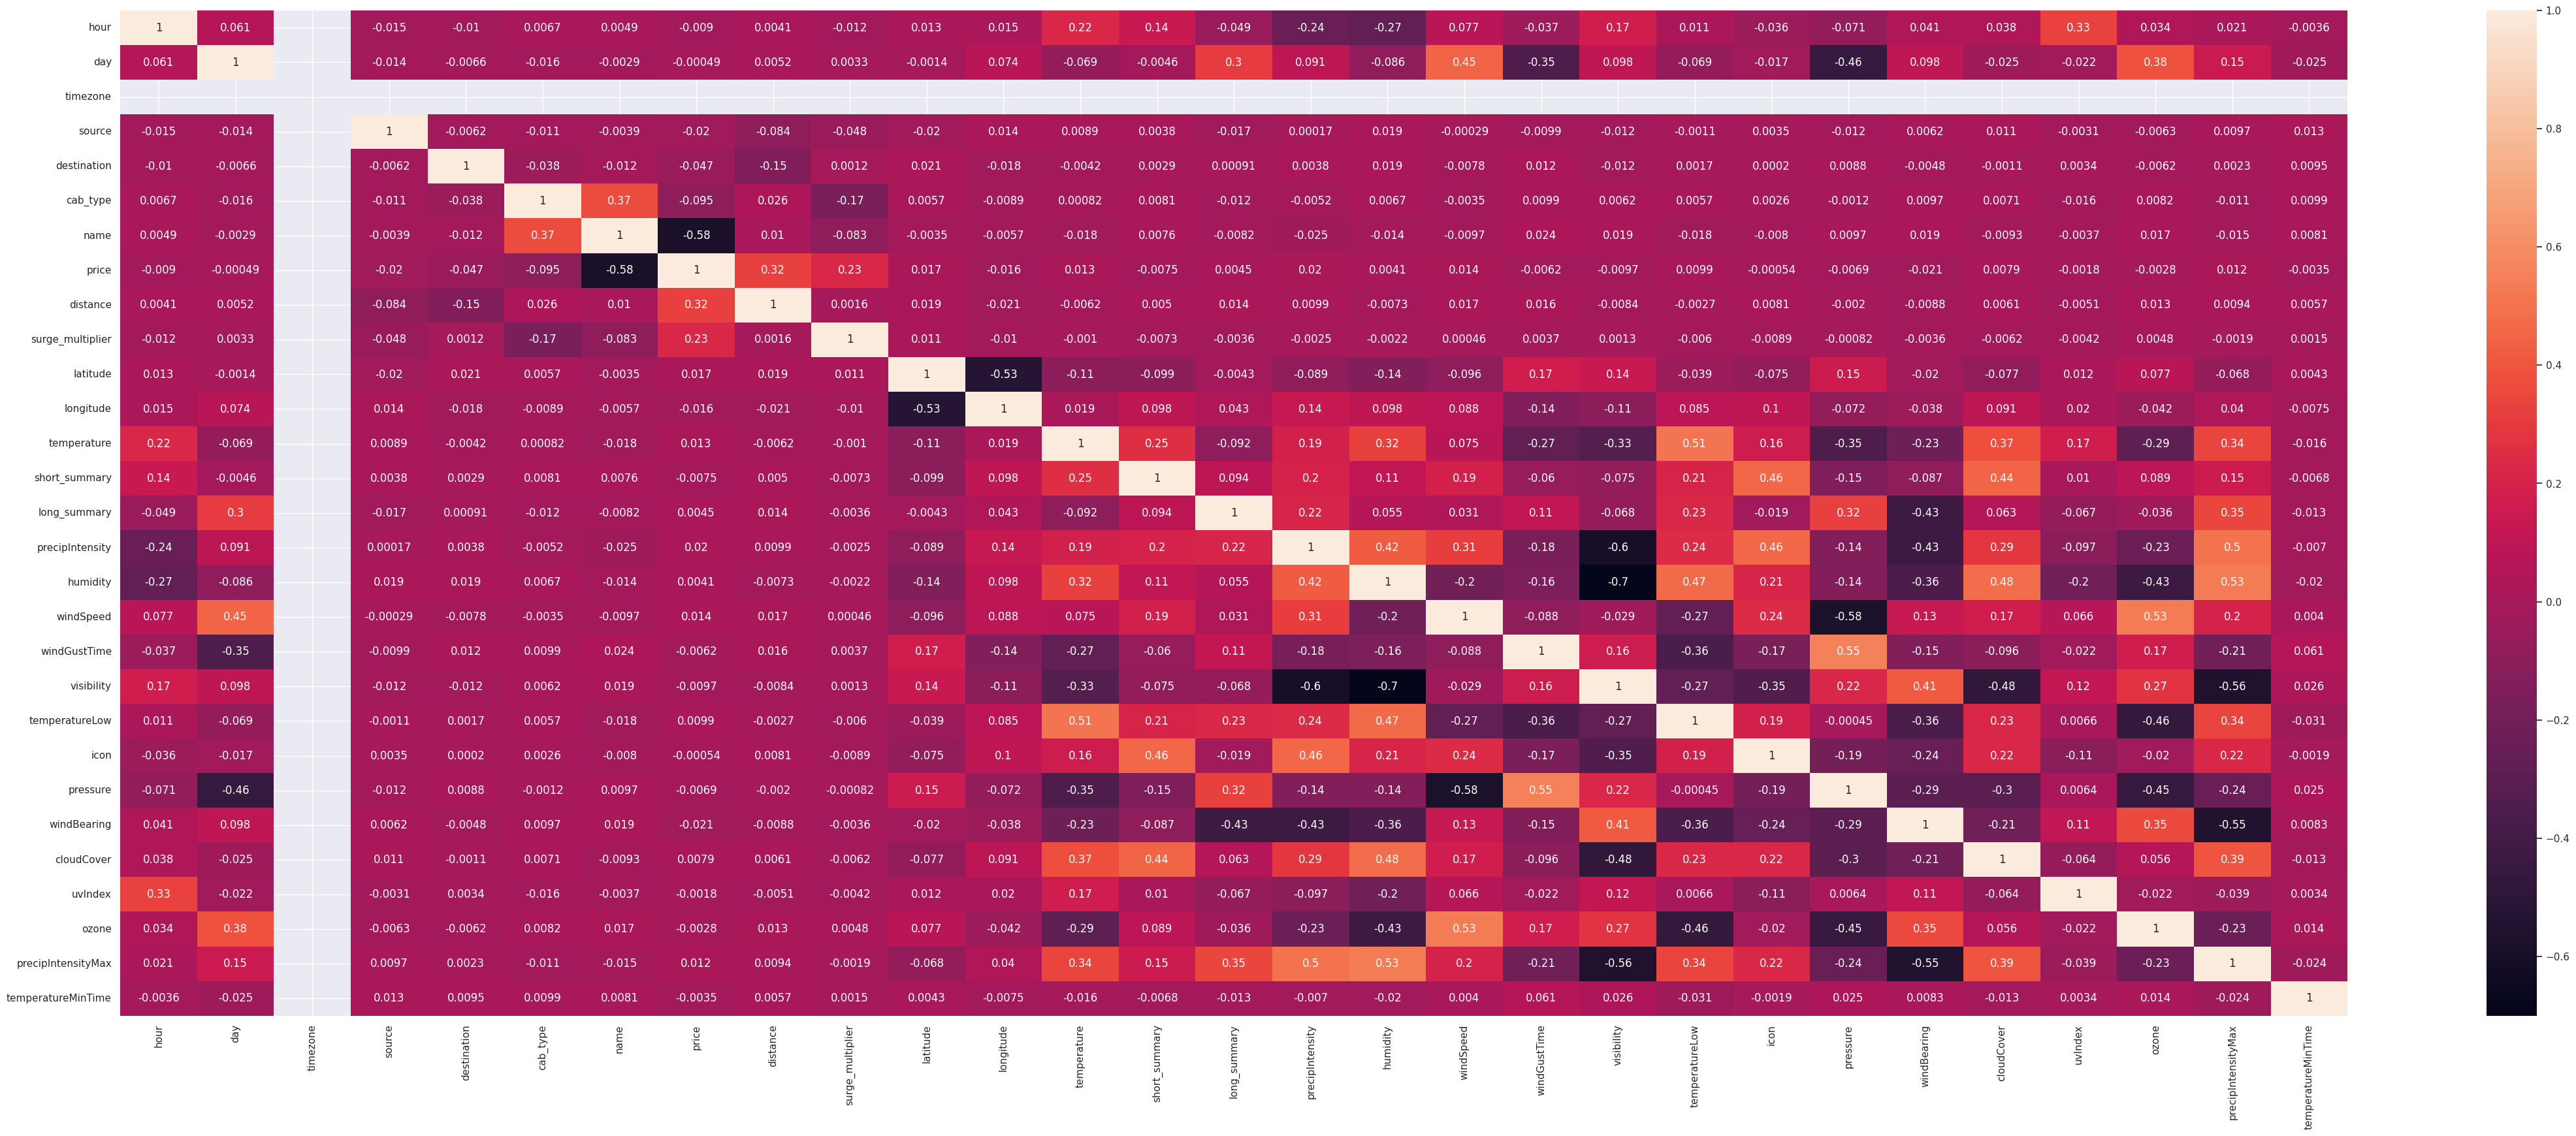

In [106]:
plt.figure(figsize=(55,20))
sns.heatmap(data.corr(),annot=True)

In [107]:
## Numerical Pipline
num_pipline = Pipeline(
    steps=[
        ("imputer",SimpleImputer(strategy="median")),
        ("scaler",StandardScaler())
    ]
)

cato_pipline = Pipeline(
    steps=[
        ("imputer",SimpleImputer(strategy="most_frequent")),
        ("scaler",StandardScaler())
    ]
)

# Create Preprocessor object
preprocessor = ColumnTransformer([
    ("num_pipline",num_pipline,numerical_features),
    ("cato_pipline",cato_pipline,categorical_features)
])

In [108]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42)

In [109]:
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [110]:
forest = RandomForestRegressor(n_estimators=300,max_depth=30,max_samples=10,max_leaf_nodes=8)
forest.fit(X_train,y_train)

RandomForestRegressor(max_depth=30, max_leaf_nodes=8, max_samples=10,
                      n_estimators=300)

In [111]:
forest.score(X_train,y_train)

0.3925085802844235

In [112]:
y_pred = forest.predict(X_test)

In [113]:
model_evaluation(y_test,y_pred)

(48.672177286786905, 6.976544795727102, 5.379503738543174, 0.391344361171438)



---



**Question 6 :-** Imagine you have a dataset where you have predicted loan Eligibility using any 4 different classification algorithms. Now you have to build a model which can predict loan Eligibility and you need to find the accuracy of the model and built-in docker and use some library to display that in frontend.

[Dataset](https://www.kaggle.com/code/ajaymanwani/loan-approval-prediction/notebook)

This is the Dataset You can use this dataset for this question.

**Answer 6 :-** Firstly download the dataset from the given link.

In [114]:
#Import required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [115]:
data = pd.read_csv("loan_data.csv")

In [116]:
data.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [117]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [118]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [119]:
import statistics as st
data["Gender"] = data["Gender"].fillna(st.mode(data["Gender"]))
data["Married"] = data["Married"].fillna(st.mode(data["Married"]))
data["Self_Employed"] = data["Self_Employed"].fillna(st.mode(data["Self_Employed"]))
data["LoanAmount"] = data["LoanAmount"].fillna(np.nanmedian(data["LoanAmount"]))
data["Loan_Amount_Term"] = data["Loan_Amount_Term"].fillna(np.nanmedian(data["Loan_Amount_Term"]))
data["Credit_History"] = data["Credit_History"].fillna(np.nanmedian(data["Credit_History"]))

In [120]:
data.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [121]:
data.drop(["Loan_ID","Dependents"],axis=1,inplace=True)

In [122]:
# seperate numerical and categorical feature
categorical_features = data.select_dtypes(include="object").columns
numerical_features = data.select_dtypes(exclude="object").columns
print(catigorical_features)
print(numerical_features)

Index(['Month', 'VisitorType'], dtype='object')
Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')


In [124]:
# use label encoding on categorical data
from sklearn.preprocessing import LabelEncoder
lable = LabelEncoder()

for i in categorical_features:
    data[i] = lable.fit_transform(data[i])

In [125]:
data.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


<Axes: >

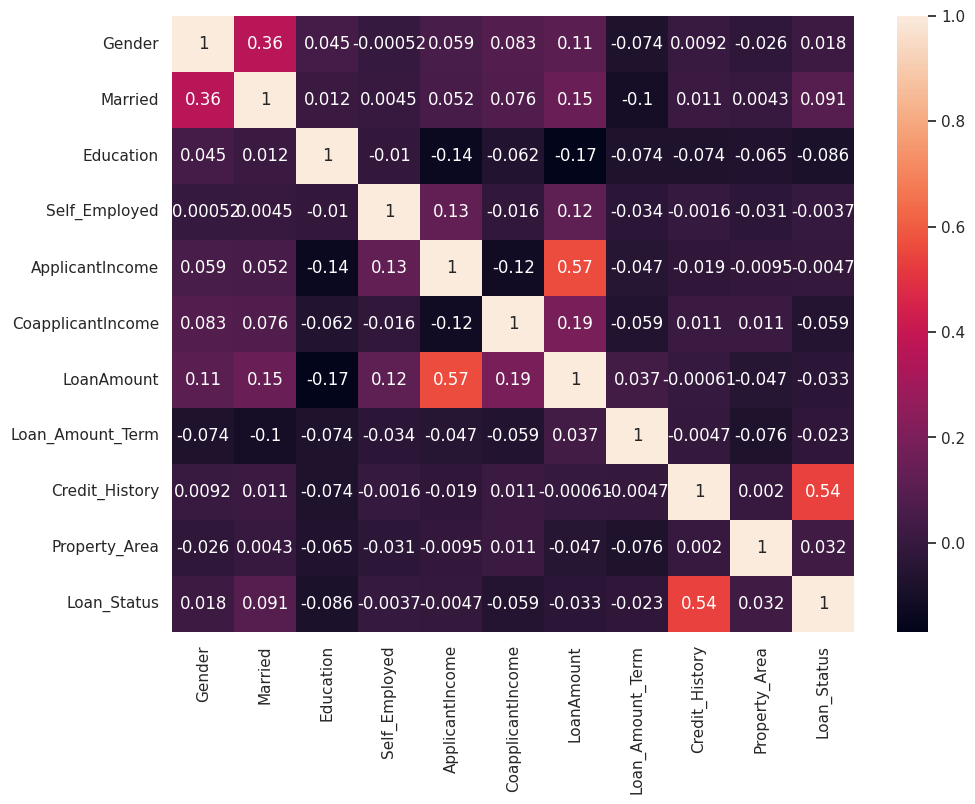

In [126]:
sns.heatmap(data.corr(),annot=True)

In [127]:
x = data.drop("Loan_Status",axis=1)
y = data["Loan_Status"]

In [128]:
# seperate numerical and categorical feature
catigorical_features = x.select_dtypes(include="object").columns
numerical_features = x.select_dtypes(exclude="object").columns
print(catigorical_features)
print(numerical_features)

Index([], dtype='object')
Index(['Gender', 'Married', 'Education', 'Self_Employed', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History',
       'Property_Area'],
      dtype='object')


In [132]:
## Numerical Pipline
num_pipline = Pipeline(
    steps=[
        ("imputer",SimpleImputer(strategy="median")),
        ("scaler",StandardScaler())
    ]
)

cato_pipline = Pipeline(
    steps=[
        ("imputer",SimpleImputer(strategy="most_frequent")),
        ("scaler",StandardScaler())
    ]
)

# Create Preprocessor object
preprocessor = ColumnTransformer([
    ("num_pipline",num_pipline,numerical_features),
    ("cato_pipline",cato_pipline,catigorical_features)
])

In [133]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42)

In [134]:
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [135]:
# logistic Regression
logistic = LogisticRegression(class_weight="balanced",C=10)
logistic.fit(X_train,y_train)

LogisticRegression(C=10, class_weight='balanced')

In [136]:
logistic.score(X_train,y_train)

0.7780040733197556

In [137]:
y_pred = logistic.predict(X_test)

In [138]:
accuracy_score(y_test,y_pred)

0.7642276422764228

In [139]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.44      0.57        43
           1       0.76      0.94      0.84        80

    accuracy                           0.76       123
   macro avg       0.77      0.69      0.70       123
weighted avg       0.77      0.76      0.74       123



In [140]:
# Bagging using tree
tree = DecisionTreeClassifier()
bagging = BaggingClassifier(tree,n_estimators=50,max_samples=8)
bagging.fit(X_train,y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), max_samples=8,
                  n_estimators=50)

In [141]:
bagging.score(X_train,y_train)

0.7596741344195519

In [142]:
y_pred = bagging.predict(X_test)

In [143]:
accuracy_score(y_test,y_pred)

0.6829268292682927

In [144]:
#Adaboost
from sklearn.ensemble import AdaBoostClassifier
adaboost = AdaBoostClassifier(n_estimators=150,learning_rate=0.1)
adaboost.fit(X_train,y_train)

AdaBoostClassifier(learning_rate=0.1, n_estimators=150)

In [145]:
adaboost.score(X_train,y_train)

0.8289205702647657

In [146]:
y_pred = adaboost.predict(X_test)

In [147]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.42      0.59        43
           1       0.76      1.00      0.86        80

    accuracy                           0.80       123
   macro avg       0.88      0.71      0.73       123
weighted avg       0.85      0.80      0.77       123



In [148]:
#Randomforest
forest = RandomForestClassifier(n_estimators=120,max_depth=8,class_weight="balanced",max_samples=2,max_leaf_nodes=3)
forest.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', max_depth=8, max_leaf_nodes=3,
                       max_samples=2, n_estimators=120)

In [149]:
forest.score(X_train,y_train)

0.6965376782077393

In [150]:
y_pred = forest.predict(X_test)

In [151]:
accuracy_score(y_test,y_pred)

0.6504065040650406

In [152]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        43
           1       0.65      1.00      0.79        80

    accuracy                           0.65       123
   macro avg       0.33      0.50      0.39       123
weighted avg       0.42      0.65      0.51       123



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))




---



**Question 7 :-** Imagine you have a dataset where you need to predict the Genres of Music using an Unsupervised algorithm and you need to find the accuracy of the model,built-in docker, and use some library to display that in frontend.

[Dataset](https://www.kaggle.com/datasets/insiyeah/musicfeatures)

This is the Dataset You can use this dataset for this question.

**Answer 7 :-**  Firstly download the dataset from the given link.

In [153]:
#Import required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [154]:
data = pd.read_csv("Music_data.csv")

In [155]:
data.head(10)

,filename,tempo,beats,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,blues.00081.au,103.359375,50,0.380260,0.248262,2116.942959,1956.611056,4196.107960,0.127272,-26.929785,107.334008,-46.809993,40.932634,-21.463776,24.816275,-18.945571,15.253459,-15.050104,12.262823,-15.234050,14.336612,-13.821769,7.562789,-6.181372,0.330165,-6.829571,0.965922,-7.570825,2.918987,blues
1,blues.00022.au,95.703125,44,0.306451,0.113475,1156.070496,1497.668176,2170.053545,0.058613,-233.860772,136.170239,3.289490,48.931193,8.699106,13.954752,5.359449,0.381334,-13.490265,16.871769,5.145258,-2.250578,3.959198,5.322555,0.812028,-1.107202,-4.556555,-2.436490,3.316913,-0.608485,blues
2,blues.00031.au,151.999081,75,0.253487,0.151571,1331.073970,1973.643437,2900.174130,0.042967,-221.802549,110.843070,18.620984,30.922996,3.291330,22.587447,-20.418303,12.120995,-26.347956,-4.356270,-26.406674,-13.037723,-12.652228,-1.821905,-7.260097,-6.660252,-14.682694,-11.719264,-11.025216,-13.387260,blues
3,blues.00012.au,184.570312,91,0.269320,0.119072,1361.045467,1567.804596,2739.625101,0.069124,-207.208080,132.799175,-15.438986,60.986727,0.725807,12.437828,1.183836,-1.540779,-17.888154,8.358496,-2.452068,-0.613248,0.384877,2.605128,-5.188924,-9.527455,-9.244394,-2.848274,-1.418707,-5.932607,blues
4,blues.00056.au,161.499023,74,0.391059,0.137728,1811.076084,2052.332563,3927.809582,0.075480,-145.434568,102.829023,-12.517677,56.993472,2.271347,26.591402,-4.274803,17.338809,-7.985593,15.235427,-6.934599,7.457218,-10.470444,-2.360483,-6.783623,2.671134,-4.760879,-0.949005,0.024832,-2.005315,blues
5,blues.00058.au,107.666016,51,0.356588,0.162028,2068.371125,2033.930047,4231.499413,0.104372,-95.436027,105.216700,-26.953012,60.830873,-4.828224,21.538471,-13.514778,12.122107,-20.233634,12.138658,-5.227018,10.262575,-9.438187,3.867535,-10.187453,3.588093,-3.100753,0.194597,0.842872,-3.416576,blues
6,blues.00066.au,161.499023,80,0.374710,0.110496,2340.432873,2256.538115,4972.503265,0.121775,-116.517402,97.430279,-13.880191,48.966759,-22.582244,27.753969,-20.228650,18.630770,-14.642884,8.473100,-16.644655,10.998190,-13.861801,9.735367,-5.089488,2.634638,-9.883816,6.159059,-7.682608,-4.852479,blues
7,blues.00060.au,151.999081,74,0.430894,0.196222,1946.565652,1979.909934,3955.867746,0.097454,-67.770980,111.704184,-34.646105,61.334896,0.050252,30.560614,-12.701725,21.159567,-13.131145,16.282294,-6.335245,12.295832,-12.477988,1.681278,-5.142068,4.644002,-6.919217,1.040718,-4.736871,-0.660037,blues
8,blues.00025.au,92.285156,45,0.290948,0.089222,1109.569627,1463.288131,2243.569767,0.051725,-249.281996,130.997924,0.665435,66.696115,17.905895,4.622960,6.610036,1.245376,1.419175,-1.584293,-0.974159,-3.575065,-2.926915,4.598686,7.478115,-0.178770,-2.818857,-2.667636,0.751667,-0.533179,blues
9,blues.00014.au,151.999081,70,0.329163,0.066981,1172.065695,1705.817502,2344.952487,0.045046,-305.705187,113.060911,12.118723,45.030003,17.769759,14.579917,4.166734,0.225273,-7.021747,13.644272,8.934529,1.298478,5.954478,8.543867,1.117664,0.591559,0.057474,-3.712342,-1.004448,-1.802434,blues


In [156]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   filename            1000 non-null   object 
 1   tempo               1000 non-null   float64
 2   beats               1000 non-null   int64  
 3   chroma_stft         1000 non-null   float64
 4   rmse                1000 non-null   float64
 5   spectral_centroid   1000 non-null   float64
 6   spectral_bandwidth  1000 non-null   float64
 7   rolloff             1000 non-null   float64
 8   zero_crossing_rate  1000 non-null   float64
 9   mfcc1               1000 non-null   float64
 10  mfcc2               1000 non-null   float64
 11  mfcc3               1000 non-null   float64
 12  mfcc4               1000 non-null   float64
 13  mfcc5               1000 non-null   float64
 14  mfcc6               1000 non-null   float64
 15  mfcc7               1000 non-null   float64
 16  mfcc8  

In [157]:
data.drop("filename",axis=1,inplace=True)

In [158]:
data.isnull().sum()

tempo                 0
beats                 0
chroma_stft           0
rmse                  0
spectral_centroid     0
spectral_bandwidth    0
rolloff               0
zero_crossing_rate    0
mfcc1                 0
mfcc2                 0
mfcc3                 0
mfcc4                 0
mfcc5                 0
mfcc6                 0
mfcc7                 0
mfcc8                 0
mfcc9                 0
mfcc10                0
mfcc11                0
mfcc12                0
mfcc13                0
mfcc14                0
mfcc15                0
mfcc16                0
mfcc17                0
mfcc18                0
mfcc19                0
mfcc20                0
label                 0
dtype: int64

In [159]:
data.duplicated().sum()

13

In [160]:
#dropping duplicate values
data.drop_duplicates(inplace=True)

In [161]:
data["label"].value_counts()

blues        100
classical    100
country      100
jazz         100
rock         100
disco         99
reggae        99
hiphop        98
pop           98
metal         93
Name: label, dtype: int64

In [162]:
# seperate numerical and categorical feature
categorical_features = data.select_dtypes(include="object").columns
numerical_features = data.select_dtypes(exclude="object").columns
print(categorical_features)
print(numerical_features)

Index(['label'], dtype='object')
Index(['tempo', 'beats', 'chroma_stft', 'rmse', 'spectral_centroid',
       'spectral_bandwidth', 'rolloff', 'zero_crossing_rate', 'mfcc1', 'mfcc2',
       'mfcc3', 'mfcc4', 'mfcc5', 'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10',
       'mfcc11', 'mfcc12', 'mfcc13', 'mfcc14', 'mfcc15', 'mfcc16', 'mfcc17',
       'mfcc18', 'mfcc19', 'mfcc20'],
      dtype='object')


In [163]:
# use label encoding on categorical data
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

for i in categorical_features:
    data[i] = lable.fit_transform(data[i])

<Axes: >

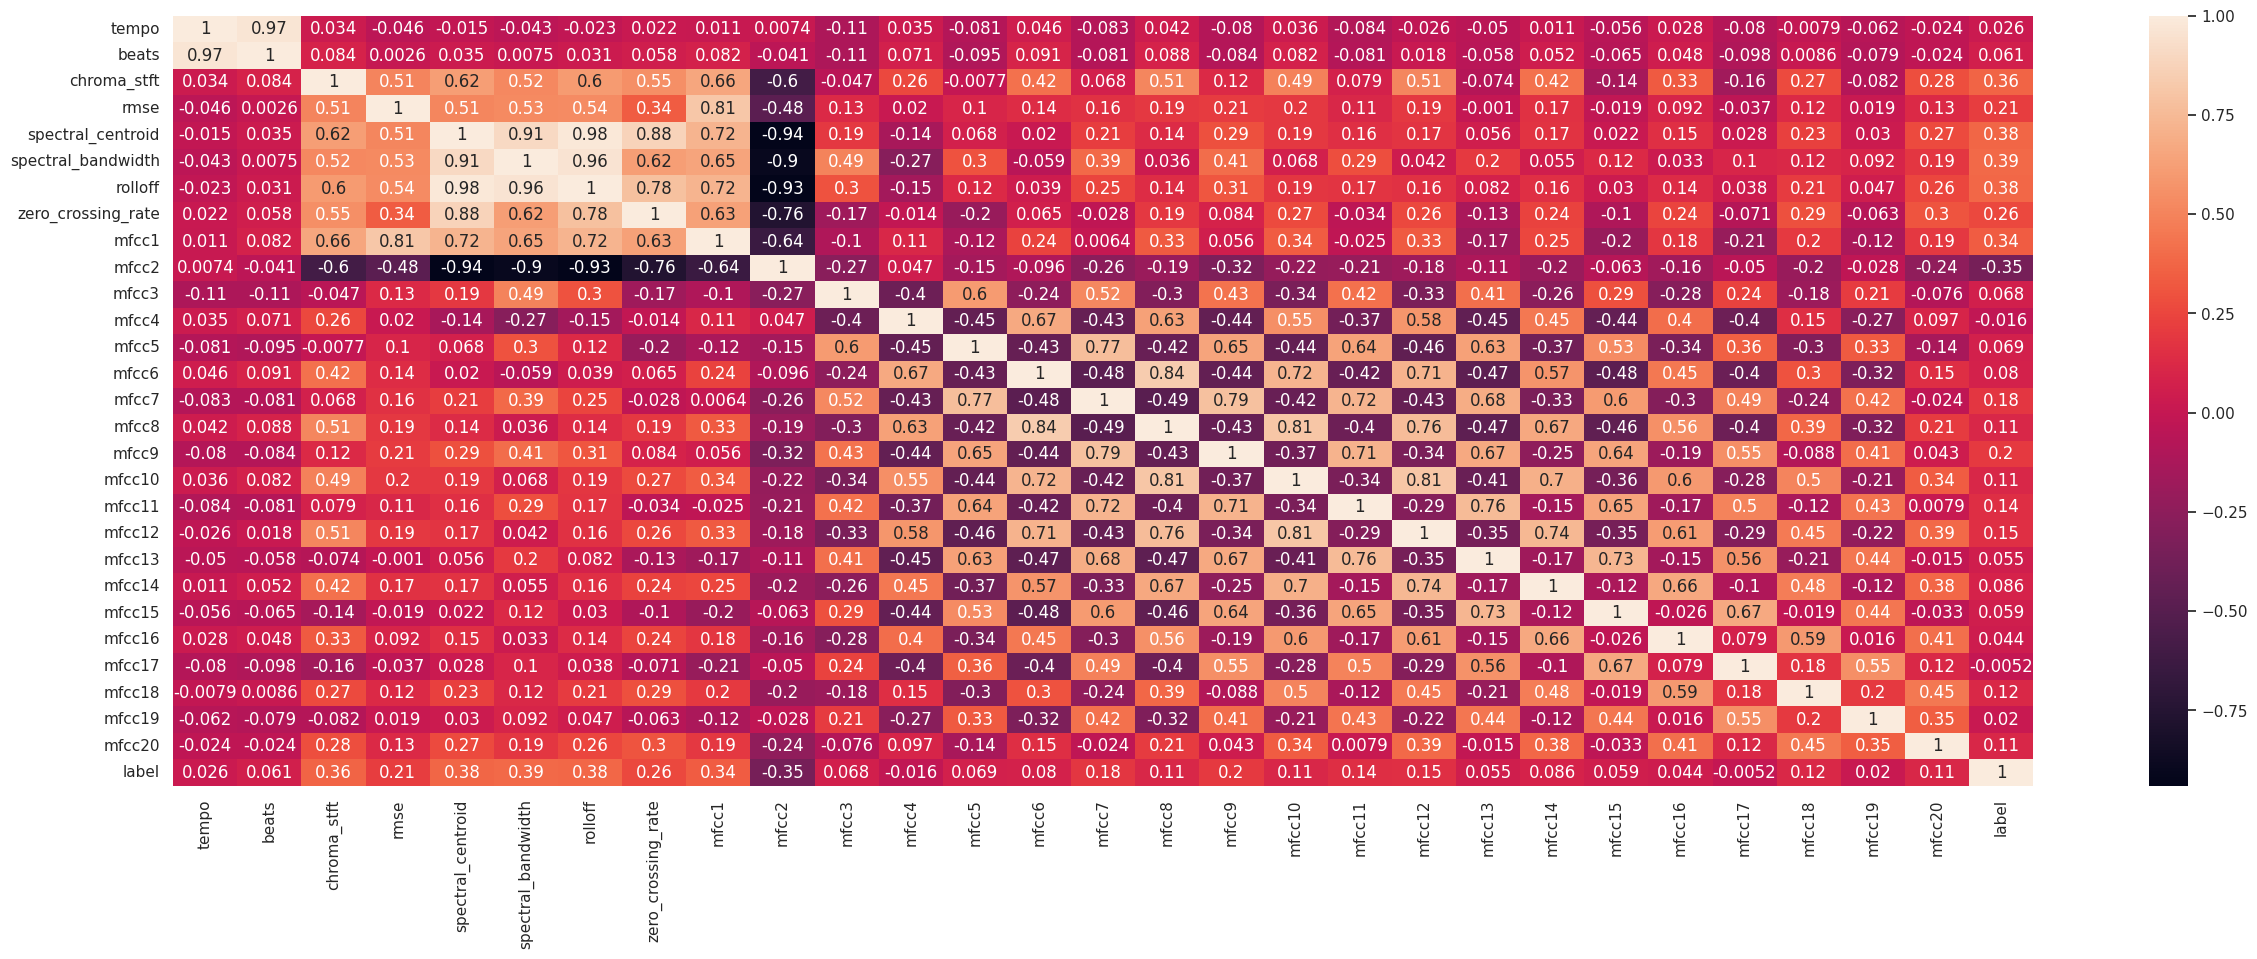

In [165]:
plt.figure(figsize=(30,10))
sns.heatmap(data.corr(),annot=True)

In [166]:
x = data.drop('label',axis=1)
y = data['label']

In [167]:
# seperate numerical and categorical feature
categorical_features = x.select_dtypes(include="object").columns
numerical_features = x.select_dtypes(exclude="object").columns
print(categorical_features)
print(numerical_features)

Index([], dtype='object')
Index(['tempo', 'beats', 'chroma_stft', 'rmse', 'spectral_centroid',
       'spectral_bandwidth', 'rolloff', 'zero_crossing_rate', 'mfcc1', 'mfcc2',
       'mfcc3', 'mfcc4', 'mfcc5', 'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10',
       'mfcc11', 'mfcc12', 'mfcc13', 'mfcc14', 'mfcc15', 'mfcc16', 'mfcc17',
       'mfcc18', 'mfcc19', 'mfcc20'],
      dtype='object')


In [168]:
#Numerical Pipline
num_pipline = Pipeline(
    steps=[
        ("imputer",SimpleImputer(strategy="median")),
        ("scaler",StandardScaler())
    ]
)

cato_pipline = Pipeline(
    steps=[
        ("imputer",SimpleImputer(strategy="most_frequent")),
        ("scaler",StandardScaler())
    ]
)

# Create Preprocessor object
preprocessor = ColumnTransformer([
    ("num_pipline",num_pipline,numerical_features),
    ("cato_pipline",cato_pipline,categorical_features)
])

In [169]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42)

In [170]:
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [171]:
# logistic Regression
logistic = LogisticRegression(class_weight="balanced",C=10)
logistic.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=10, class_weight='balanced')

In [173]:
logistic.score(X_train,y_train)

0.7401774397972116

In [174]:
y_pred = logistic.predict(X_test)

In [175]:
accuracy_score(y_test,y_pred)

0.5959595959595959

In [176]:
# Gradient boosting
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(X_train,y_train)

GradientBoostingClassifier()

In [177]:
gb.score(X_train,y_train)

0.9987325728770595

In [178]:
y_pred = gb.predict(X_test)

In [189]:
accuracy_score(y_test,y_pred)

0.6414141414141414



---



**Question 8**, **Question 9**, **Question 10** And **Advanced Questions** not done. Due to some complex data type and too big data sets.



---

